<a href="https://colab.research.google.com/github/hamednasr/TensorFlow-Projects/blob/main/FashionMNIST_classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST classification with TensorFlow

## import data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2944299781595151397
xla_global_id: -1
]


In [3]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
classes = {
  0: 'T-shirt/top',
  1: 'trouser',
  2: 'pullover',
  3: 'dress',
  4: 'coat',
  5: 'sandal',
  6: 'shirt',
  7: 'sneaker',
  8: 'bag',
  9: 'ankle boot'
}

In [9]:
classes[y_train[6]]

'sneaker'

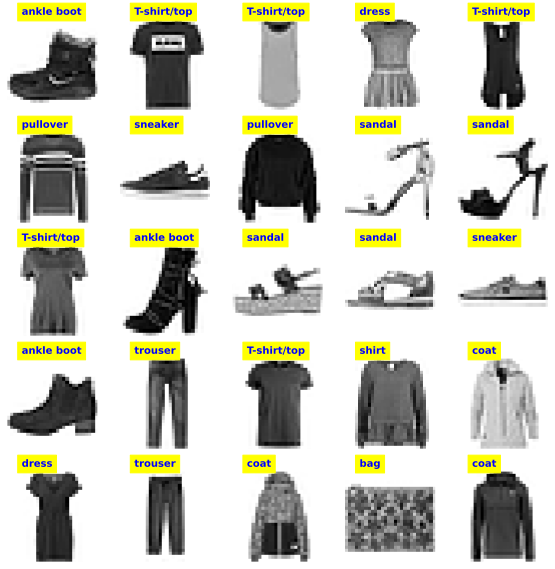

In [10]:
fig, axes = plt.subplots(5,5,figsize=(8,8))
for i , ax in enumerate(axes.flatten()):
  ax.imshow(X_train[i,:],cmap='binary')
  ax.axis('off')
  ax.text(4,-2,classes[y_train[i]],
          backgroundcolor='yellow',
          fontweight='bold',
          color='blue')
plt.tight_layout()

In [11]:
X_train = X_train/255

In [12]:
X_train.max()

1.0

In [13]:
X_test = X_test/255

## create and train model

In [14]:
from sklearn.utils.extmath import softmax

model = tf.keras.Sequential()
# model.add(tf.keras.layers.InputLayer(input_shape=(28,28)))
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# model.add(tf.keras.layers.Dense(512,activation=tf.keras.layers.LeakyReLU()))
# model.add(tf.keras.layers.Dense(256,activation=tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.Dense(128,activation=tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.Dense(64,activation=tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax))
# model.add(tf.keras.layers.Activation(tf.keras.activations.softmax))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train,
          epochs= 10,
          batch_size=64,
          validation_split=.1)

Epoch 1/10
844/844 [==============================] - 6s 6ms/step - loss: 0.5261 - accuracy: 0.8152 - val_loss: 0.4045 - val_accuracy: 0.8508
Epoch 2/10
844/844 [==============================] - 6s 7ms/step - loss: 0.3910 - accuracy: 0.8591 - val_loss: 0.3815 - val_accuracy: 0.8603
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3562 - accuracy: 0.8715 - val_loss: 0.3443 - val_accuracy: 0.8718
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3352 - accuracy: 0.8775 - val_loss: 0.3707 - val_accuracy: 0.8653
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3192 - accuracy: 0.8820 - val_loss: 0.3271 - val_accuracy: 0.8785
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3067 - accuracy: 0.8868 - val_loss: 0.3372 - val_accuracy: 0.8777
Epoch 7/10
844/844 [==============================] - 3s 3ms/step - loss: 0.2945 - accuracy: 0.8902 - val_loss: 0.3351 - val_accuracy: 0.8763
Epoch 

## model evaluation

In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8546


[0.4093559682369232, 0.8546000123023987]

In [17]:
results = pd.DataFrame(history.history)*100
results

,loss,accuracy,val_loss,val_accuracy
0,52.606833,81.520373,40.449131,85.083336
1,39.095935,85.911113,38.146740,86.033332
2,35.624993,87.146294,34.425613,87.183332
3,33.515874,87.753701,37.073475,86.533332
4,31.918198,88.198149,32.709390,87.849998
5,30.674571,88.675928,33.718279,87.766665
6,29.451928,89.018518,33.514646,87.633336
7,28.473055,89.331484,39.523530,86.083335
8,27.448171,89.740741,31.832904,88.383335
9,26.880786,89.887035,38.348487,86.666667


In [18]:
pd.options.plotting.backend = "plotly"
results.plot()

In [19]:
y_pred = model.predict(X_test)

In [20]:
cm = confusion_matrix(y_test,np.argmax(y_pred,axis=1),normalize='true')

In [21]:
print(cm)

[[0.778 0.008 0.028 0.063 0.007 0.    0.099 0.    0.017 0.   ]
 [0.001 0.974 0.001 0.02  0.002 0.    0.001 0.    0.001 0.   ]
 [0.011 0.005 0.769 0.017 0.171 0.    0.022 0.001 0.004 0.   ]
 [0.012 0.015 0.01  0.913 0.033 0.    0.012 0.    0.005 0.   ]
 [0.    0.001 0.082 0.03  0.873 0.    0.01  0.    0.004 0.   ]
 [0.    0.    0.    0.001 0.    0.901 0.    0.064 0.006 0.028]
 [0.111 0.006 0.157 0.05  0.205 0.    0.454 0.    0.017 0.   ]
 [0.    0.    0.    0.    0.    0.006 0.    0.97  0.002 0.022]
 [0.003 0.003 0.004 0.007 0.006 0.001 0.    0.004 0.972 0.   ]
 [0.    0.    0.    0.001 0.    0.003 0.001 0.053 0.    0.942]]


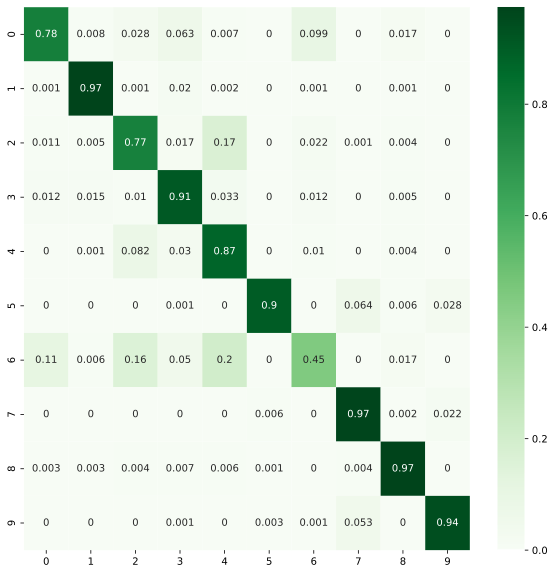

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap='Greens')

In [23]:
print(classification_report(y_test,np.argmax(y_pred,axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1000
           1       0.96      0.97      0.97      1000
           2       0.73      0.77      0.75      1000
           3       0.83      0.91      0.87      1000
           4       0.67      0.87      0.76      1000
           5       0.99      0.90      0.94      1000
           6       0.76      0.45      0.57      1000
           7       0.89      0.97      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



## Make a function to show an image of a certain class and make a prediction on it. 

In [41]:
np.random.choice(np.where(y_test==4)[0],5)

array([9509,  127, 6801, 6837, 2619])

In [45]:
def imagepred(cloth='coat'):

  key_list = list(classes.keys())
  val_list = list(classes.values())
  position = val_list.index(cloth)

  rand9 = np.random.choice(np.where(y_test==position)[0],9)
  pred = model.predict(X_test[rand9,:])
  predclass = np.argmax(pred,axis=1)
  print(predclass)

  fig, axes = plt.subplots(3,3,figsize=(8,8))

  for i, ax in enumerate(axes.flatten()):
    
    ax.imshow(X_test[rand9[i],:],cmap='binary')
    ax.axis('off')
    ax.text(4,-2,f'predicted: {classes[predclass[i]]}',
            backgroundcolor='yellow',
            fontweight='bold',
            color='blue')
  plt.tight_layout()

[6 4 4 4 4 4 4 4 4]


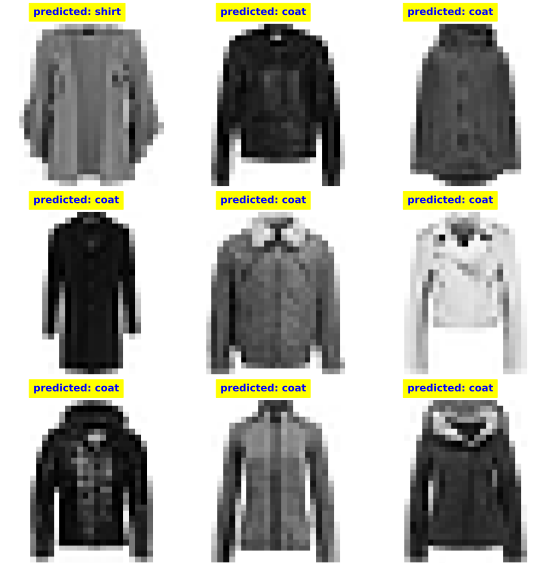

In [51]:
imagepred('coat')